# MatSpy

Sparse matrix spy plot and sparkline renderer.

## Quick start

In [1]:
from matspy import spy

In [2]:
# Load a matrix
import scipy

A = scipy.io.mmread("doc/matrices/email-Eu-core.mtx.gz").tocsr()

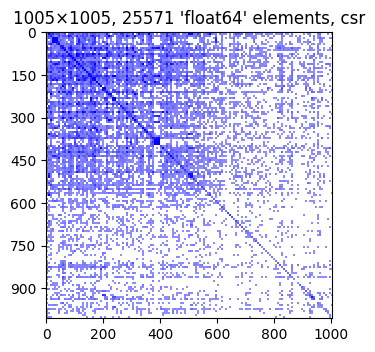

In [3]:
spy(A)

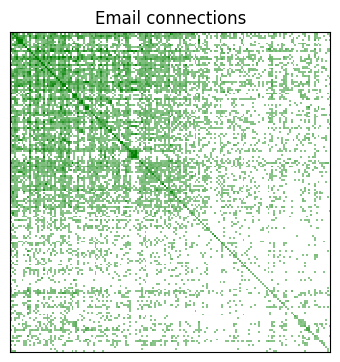

In [4]:
spy(A, title="Email connections", indices=False, color_full="green")

# Compared to `matplotlib.pyplot.spy`

[matplotlib.pyplot.spy](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.spy.html) can natively generate spy plots of dense arrays and `scipy.sparse.spmatrix` instances.

`plt.spy()` uses markers for nonzero elements which are highly customizable like a scatter plot. However matspy can easily scale up to plot significantly larger matrices.

# Shading: binary, relative, absolute

Common spy plots plot a marker at every location with a nonzero value, and empty space otherwise. MatSpy calls this binary shading.

MatSpy has two more modes: `relative` and `absolute`. Relative marks the densest cell as 1, and all other densities are relative to this. This helps distinguishing more or less dense areas of the matrix.

Absolute mode takes this further by showing absolute density, not relative to the densest part. Such spy plots are typically lighter in color than relative ones, but allows one to directly compare spy plots from different matrices and immediately see density differences.

binary,relative,absolute
,,

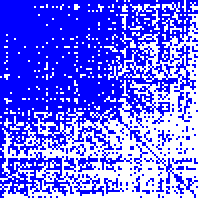
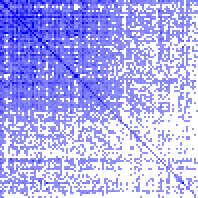
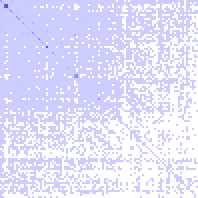

In [5]:
from IPython.display import display, HTML
from matspy import spy, to_sparkline

display(HTML(f'<table><tr>'
             f'<th style="text-align: center">binary</th>'
             f'<th style="text-align: center">relative</th>'
             f'<th style="text-align: center">absolute</th></tr><tr>'
             f"<td>{to_sparkline(A, sparkline_size=2, shading='binary', dpi=50)}</td>"
             f"<td>{to_sparkline(A, sparkline_size=2, shading='relative', dpi=50)}</td>"
             f"<td>{to_sparkline(A, sparkline_size=2, shading='absolute', dpi=50)}</td>"
             f"</tr></table>"))

# Fast Spy Plots via Triple Product

A spy plot is a down-sample of the matrix performed with two matrix multiplies. This method supports very large matrices because only the native engine touches the large original matrix.

Visually:


,×,,×,,=,

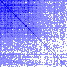
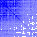

In [6]:
mat = A

from matspy.adapters.scipy_impl import generate_spy_triple_product_coo
left, right = generate_spy_triple_product_coo(mat.shape, tuple(int(x / 3) for x in mat.shape))

mat_sparkline, scale = to_sparkline(mat, retscale=True)
display(HTML(f"<table><tr>"
             f"<td>{to_sparkline(left, scale=scale, color_full='red')}</td> <td>&times;</td>"
             f"<td>{mat_sparkline}</td> <td>&times;</td>"
             f"<td>{to_sparkline(right, scale=scale, color_full='red')}</td> <td>=</td>"
             f"<td>{to_sparkline(left @ mat @ right, scale=scale)}</td>"
             f"</tr></table>"))

Or in matrix form.

First create a structural view of the source matrix. This has the same nonzero pattern as the original matrix, but with all entries having the value of 1:

In [7]:
from IPython.display import display, Latex
from matrepr import to_latex
import numpy as np
np.random.seed(1)

orig = scipy.sparse.random(8, 8, density=0.3)
mat = orig.copy()
mat.data = np.ones(shape=mat.data.shape)
display(Latex(f"${to_latex(orig, title='original matrix')} \\rightarrow {to_latex(mat, title='structural view')}$"))

<IPython.core.display.Latex object>

Now the triple product:

In [8]:
left, right = generate_spy_triple_product_coo(mat.shape, (4, 4))

display(Latex(f"${to_latex(left)} \\times {to_latex(mat, title='structural view')} \\times {to_latex(right)} = {to_latex(left @ mat @ right, title='spy')}$"))

<IPython.core.display.Latex object>

Finally the values of the spy matrix are normalized according to the `shading` preference and plotted as an image.

# Large matrices

Large matrices are no problem. A spy plot for a matrix with 20M elements takes less than half a second.

In [9]:
from time import time

### Large NNZ: Timing a matrix with 20M nonzeros

In [10]:
mat = scipy.sparse.random(10_000, 10_000, density=0.2).tocsr()

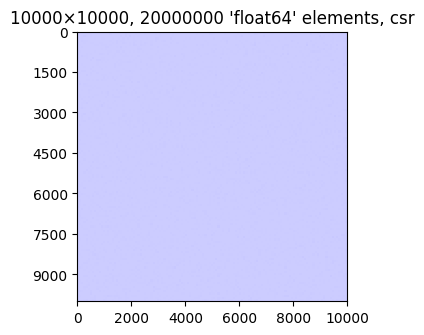

spy() runtime: 0.14s.


In [11]:
# Measure spy plot creation time
start = time()

spy(mat, shading='absolute')

print(f"spy() runtime: {time()-start:.2}s.")

### Large dimensions: Timing a matrix with 10M rows and columns

In [12]:
mat = scipy.sparse.eye(10_000_000).tocsr()

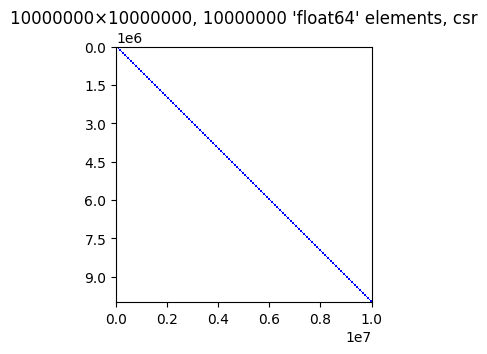

spy() runtime: 0.46s.


In [13]:
# Measure spy plot creation time
start = time()

spy(mat)

print(f"spy() runtime: {time()-start:.2}s.")